In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


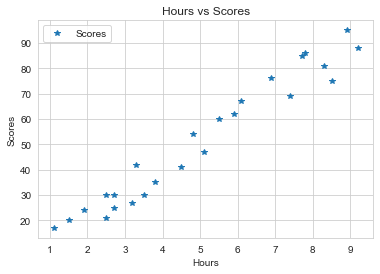

In [4]:
sns.set_style("whitegrid")
data.plot(x="Hours", y="Scores", style="*")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

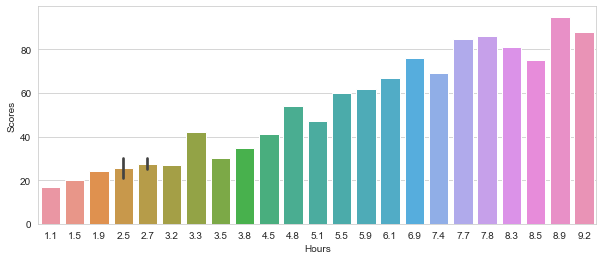

In [5]:
plt.figure(figsize =(10,4))
sns.barplot(x = data.Hours, y= data.Scores)

In [6]:
X= data.iloc[:,:-1].values
y= data.iloc[:,1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.33, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

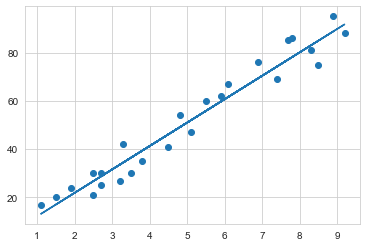

In [9]:
line = lr.coef_*X+lr.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [10]:
y_pred = lr.predict(X_test)
y_pred
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]]


In [11]:
df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
df

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


In [12]:
hours = [[9.25]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.14523314523314


In [13]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.691397441397438
